In [139]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from sympy.utilities.iterables import variations
import time
import itertools
from matplotlib.ticker import PercentFormatter
from scipy.optimize import curve_fit
import warnings
#import time as t
warnings.filterwarnings("ignore")
%matplotlib inline

In [151]:
def counter_list(l,x):
    counter = 0
    for j in range(len(l)):
        if l[j] == x:
            counter +=1
    return counter
def sum_list(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10):
    sumList = []
    for i in range(len(l1)):
        temp = l1[i]+l2[i]+l3[i]+l4[i]+l5[i]+l6[i] + l7[i]+l8[i]+l9[i]+l10[i]
        sumList.append(temp)
    return sumList

In [47]:
#quick bit of code to check the activity
#rejected_moves_l = []
'''
average_l= []
average_r=[]
for i in range(15):
    file = "data_lowT/data_flat_nobc/lowT_variables_flatnobc_{}.txt"
    form_file = file.format(i)
    file = open(form_file, "r")
    #print(i+1,':')
    #content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]
    lines = file.read().splitlines()
    activity_temp = list(map(int,((lines[10].replace('[','')).replace(']','')).split(",")))
    n=50
    moves = [counter_list(activity_temp,i) for i in range(n)]
    #rejected_moves = counter_list(activity_temp,-1)
    #print(rejected_moves)
    #rejected_moves_l.append(rejected_moves)
    #print("left: ", np.mean(moves[:25]))
    average_l.append(np.mean(moves[:25]))
    #print("right: ", np.mean(moves[25:]))
    average_r.append(np.mean(moves[25:]))
    file.close()
#print(rejected_moves_l)
#print(np.mean(rejected_moves_l))
print(average_l)
print(np.mean(average_l))
print(average_r)
print(np.mean(average_r))
'''

'\naverage_l= []\naverage_r=[]\nfor i in range(15):\n    file = "data_lowT/data_flat_nobc/lowT_variables_flatnobc_{}.txt"\n    form_file = file.format(i)\n    file = open(form_file, "r")\n    #print(i+1,\':\')\n    #content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]\n    lines = file.read().splitlines()\n    activity_temp = list(map(int,((lines[10].replace(\'[\',\'\')).replace(\']\',\'\')).split(",")))\n    n=50\n    moves = [counter_list(activity_temp,i) for i in range(n)]\n    #rejected_moves = counter_list(activity_temp,-1)\n    #print(rejected_moves)\n    #rejected_moves_l.append(rejected_moves)\n    #print("left: ", np.mean(moves[:25]))\n    average_l.append(np.mean(moves[:25]))\n    #print("right: ", np.mean(moves[25:]))\n    average_r.append(np.mean(moves[25:]))\n    file.close()\n#print(rejected_moves_l)\n#print(np.mean(rejected_moves_l))\nprint(average_l)\nprint(np.mean(average_l)

## Results from 1 File

In [119]:
file = open('data_rel_T/variables_curvednobc_rel.txt', "r")
#file = open('data_T=2/data_flat_bc/variables_flatbc_21.txt', "r")
#file = open('data_lowT/data_flat_nobc/variables_flat_nobc_lowT.txt', "r")
#file = open('data_gen/data_flat_bc.txt', "r")
#content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]
lines = file.read().splitlines()

magnetization = list(map(float,((lines[1].replace('[','')).replace(']','')).split(",")))
energy = list(map(float,((lines[3].replace('[','')).replace(']','')).split(",")))
energy1D = list(map(float,((lines[5].replace('[','')).replace(']','')).split(",")))
length_x = list(map(float,((lines[7].replace('[','')).replace(']','')).split(",")))
length_y = list(map(float,((lines[8].replace('[','')).replace(']','')).split(",")))
#activity = list(map(int,((lines[10].replace('[','')).replace(']','')).split(",")))
numer_of_regions = list(map(int,((lines[10].replace('[','')).replace(']','')).split(",")))
#poss = list(map(int,((lines[14].replace('[','')).replace(']','')).split(",")))
print(type(magnetization))

<class 'list'>


In [120]:
'''print(len(magnetization))
print("mean magnetization:", np.mean(magnetization))
#print("mean magnetization last 1000:", np.mean(magnetization[-1000:]))
#print(magnetization)
print(len(energy))
print("mean energy:", np.mean(energy))
#print("mean energy last 1000:", np.mean(energy[-1000:]))
#print(energy)
print(len(energy1D))
#print(energy1D)
print(len(length_x))
print("mean length x:", np.mean(length_x))
print("mean length x last 1000:", np.mean(length_x[-1000:]))
#print(length_x)
print(len(length_y))
print("mean length y:", np.mean(length_y))
print("mean length y last 1000:", np.mean(length_y[-1000:]))
#print(length_y)
#print(len(activity))
n=50
#moves = [counter_list(activity,i) for i in range(n)]
#print("mean activity:", np.mean(moves[:25]))
#print("mean activity last 80%:", np.mean(moves[25:]))
#print(activity)
#print(len(numer_of_regions))
steps = [i for i in range(len(magnetization))]'''

'print(len(magnetization))\nprint("mean magnetization:", np.mean(magnetization))\n#print("mean magnetization last 1000:", np.mean(magnetization[-1000:]))\n#print(magnetization)\nprint(len(energy))\nprint("mean energy:", np.mean(energy))\n#print("mean energy last 1000:", np.mean(energy[-1000:]))\n#print(energy)\nprint(len(energy1D))\n#print(energy1D)\nprint(len(length_x))\nprint("mean length x:", np.mean(length_x))\nprint("mean length x last 1000:", np.mean(length_x[-1000:]))\n#print(length_x)\nprint(len(length_y))\nprint("mean length y:", np.mean(length_y))\nprint("mean length y last 1000:", np.mean(length_y[-1000:]))\n#print(length_y)\n#print(len(activity))\nn=50\n#moves = [counter_list(activity,i) for i in range(n)]\n#print("mean activity:", np.mean(moves[:25]))\n#print("mean activity last 80%:", np.mean(moves[25:]))\n#print(activity)\n#print(len(numer_of_regions))\nsteps = [i for i in range(len(magnetization))]'

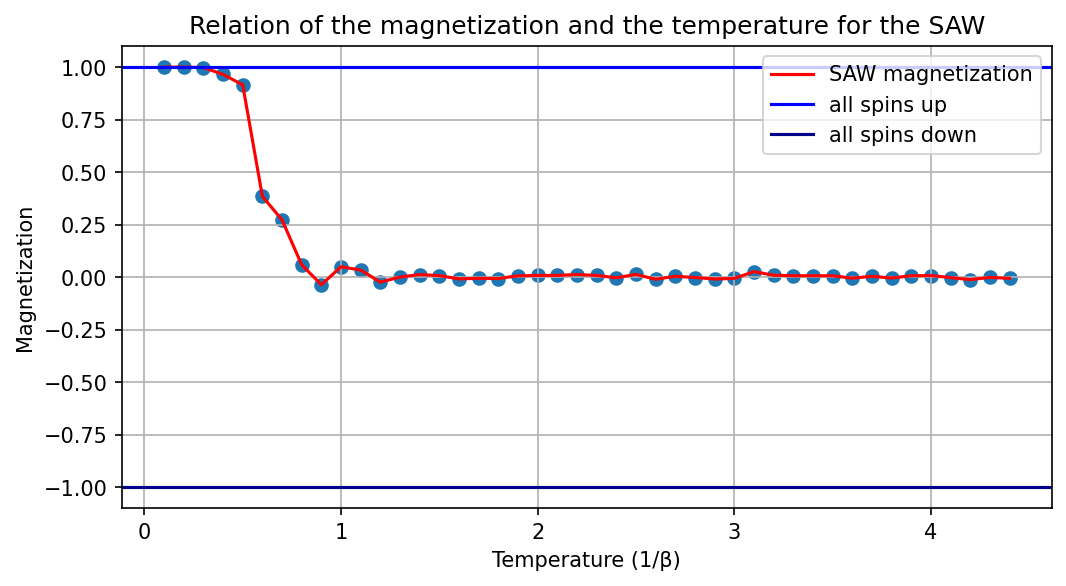

In [121]:
T = np.arange(0.1,4.5, 0.1)
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Relation of the magnetization and the temperature for the SAW')
#plt.xlabel('Time (Monte Carlo steps)')
plt.xlabel('Temperature (1/β)')
plt.ylabel('Magnetization')
plt.grid()
#plt.xlim(0,10**5)
#plt.ylim(-0.4,1)=
plt.plot(T,magnetization, color = 'red', label='SAW magnetization')
plt.scatter(T,magnetization)
#plt.plot(-energy_after/100, color = 'blue', label='SAW_E')
plt.axhline(1, color='blue', label='all spins up')
plt.axhline(-1, color='darkblue', label='all spins down')
#plt.axhline(np.mean(magnetization),color= 'black', label= 'average')
#plt.axhline(np.mean(magnetization[-1000:]),color= 'forestgreen', label= 'average last 1000')
#plt.plot(mag_after_2, label='SAW_2')
#plt.axhline(y = mag_exact,color = 'black', label = 'exact')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/metropol_magn_combo_flat_bc_lowT.png', bbox_inches = 'tight')
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/T_vs_mag_flat_SAW_100.png', bbox_inches = 'tight')

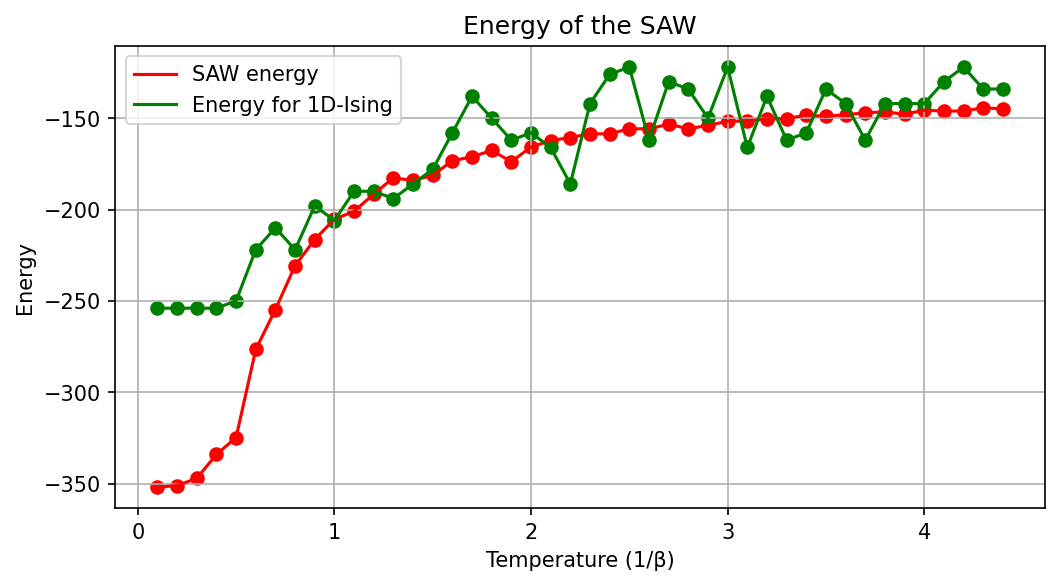

In [122]:
esteps = np.arange(0,10**5+1, 10**3)
T = np.arange(0.1,4.5,0.1)
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Energy of the SAW')
#plt.xlabel('Time (Monte Carlo steps)')
plt.xlabel('Temperature (1/β)')
plt.ylabel('Energy')
plt.grid()
#plt.xlim(0,10**5)
plt.plot(T,energy, color = 'red', label='SAW energy')
plt.scatter(T, energy, color='red')
plt.scatter(T,energy1D, color='g')
#plt.plot(np.cumsum(energy_after) / (1+np.arange(len(energy_after)))/len(x), color = 'purple', label = 'running mean of the energy')
#plt.axhline(energy_ising_1d(spins_1d), color = 'blue', label='energy 1D Ising')
plt.plot(T,energy1D,color = 'g', label= 'Energy for 1D-Ising')
#plt.axhline(np.mean(energy),color= 'black', label= 'average')
#plt.axhline(np.mean(energy[-1000:]),color= 'forestgreen', label= 'average last 1000')
#plt.plot(mag_after_2, label='SAW_2')
#plt.axhline(y = mag_exact,color = 'black', label = 'exact')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/metropol_ener_combo_flat_nobc_lowT.png', bbox_inches = 'tight')
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/T_vs_E_flat_SAW_100.png', bbox_inches = 'tight')

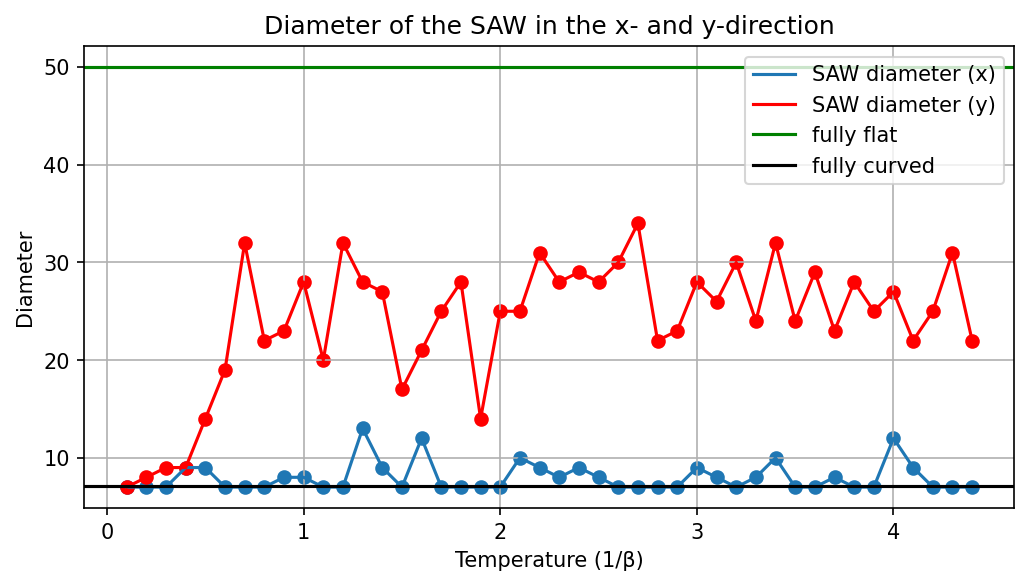

In [123]:
T = np.arange(0.1,4.5,0.1)
len_x = 50
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Diameter of the SAW in the x- and y-direction')
#plt.xlabel('Time (Monte Carlo steps)')
plt.xlabel('Temperature (1/β)')
plt.ylabel('Diameter')
plt.grid()
#plt.xlim(0,10**5)
plt.plot(T,length_x, label='SAW diameter (x)')
plt.scatter(T,length_x)
plt.plot(T,length_y, color = 'red', label='SAW diameter (y)')
plt.scatter(T,length_y, color ='red')
plt.axhline(len_x,color='g', label='fully flat')
plt.axhline(np.sqrt(len_x),color='black', label='fully curved')
#plt.axhline(np.mean(length_y),color= 'black', label= 'average')
#plt.axhline(np.mean(length_y[-1000:]),color= 'forestgreen', label= 'average last 1000')
#plt.plot(mag_after_2, label='SAW_2')
#plt.axhline(y = mag_exact,color = 'black', label = 'exact')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/metropol_len_combo_flat_bc_lowT.png', bbox_inches = 'tight')
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/T_vs_len_flat_SAW_100.png', bbox_inches = 'tight')

In [124]:
steps = [i for i in range(101)]
esteps = np.arange(0,10**5+1, 10**3)
T = np.arange(0.1,4.5,0.1)

In [125]:
#z_regions = np.polyfit(steps[1:], numer_of_regions[1:], 1)
#p_regions = np.poly1d(z_regions)
#print(p_regions)
print(numer_of_regions[-1])
print(np.mean(numer_of_regions))
print(numer_of_regions)
print(len(numer_of_regions))
print(len(T))
len_x= 50

1
21.555555555555557
[1, 1, 1, 1, 2, 9, 12, 9, 15, 13, 17, 17, 16, 18, 20, 25, 30, 27, 24, 25, 23, 18, 29, 33, 34, 24, 32, 31, 27, 34, 23, 30, 24, 25, 31, 29, 24, 29, 29, 29, 32, 34, 31, 31, 1]
45
44


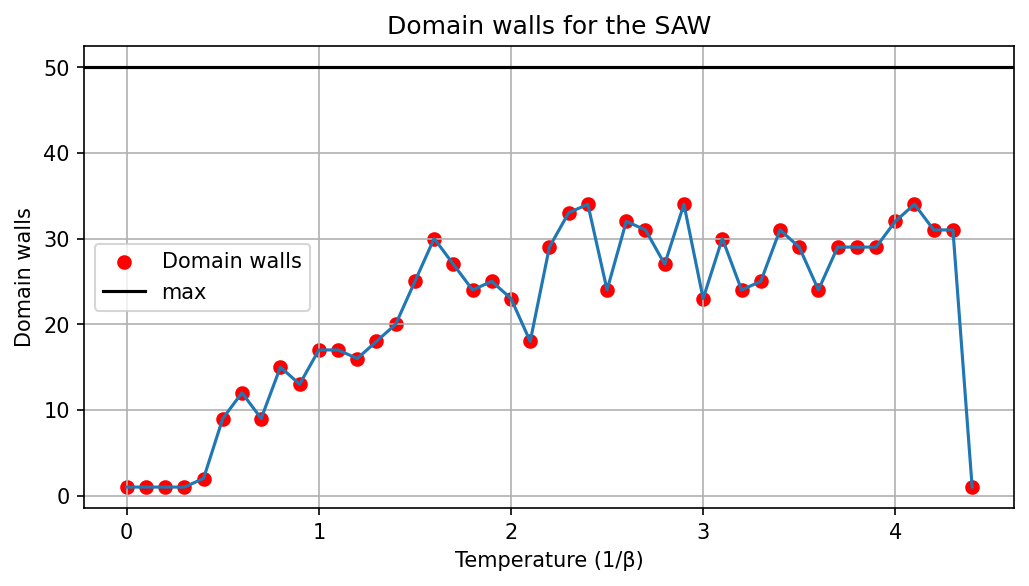

In [126]:
T = np.arange(0,4.5,0.1)
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Domain walls for the SAW')
#plt.xlabel('Time (Monte Carlo steps)')
plt.xlabel('Temperature (1/β)')
plt.ylabel('Domain walls')
plt.grid()
#plt.xlim(0,10**5)
plt.scatter(T,numer_of_regions,color='red', label='Domain walls')
plt.plot(T,numer_of_regions)
#plt.plot(esteps, p_regions(steps),color = 'k', label = 'trend')
#plt.plot(np.cumsum(energy_after) / (1+np.arange(len(energy_after)))/len(x), color = 'purple', label = 'running mean of the energy')
plt.axhline(len_x,color = 'k', label='max')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/metropol_nor_combo_flat_bc_lowT.png', bbox_inches = 'tight')
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/T_vs_nor_flat_SAW_100.png', bbox_inches = 'tight')

In [12]:
n=50
vertices = [i for i in range(1,n+1)]
moves = [counter_list(activity,i) for i in range(n)]
all_poss_moves = [counter_list(poss,i) for i in range(n)]

In [13]:
#print(poss)
print("number of rejected moves:",counter_list(activity,-1))
print("First move:",activity[0])

number of rejected moves: 2358
First move: 49


In [14]:
print("vertices:",vertices)
print("length: ",len(vertices))
print('moves:',moves)
print("length: ",len(moves))
print("all possible moves:",all_poss_moves)
print("length: ",len(all_poss_moves))
print("mean of moves left vs right")
print(np.mean(moves[:25]))
print(np.mean(moves[25:]))
print("mean possible moves left vs right")
print(np.mean(all_poss_moves[:25]))
print(np.mean(all_poss_moves[25:]))

vertices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
length:  50
moves: [2277, 901, 809, 876, 764, 743, 732, 892, 906, 896, 854, 818, 768, 823, 840, 847, 845, 811, 874, 824, 725, 799, 885, 885, 943, 999, 1014, 1054, 1113, 993, 1038, 997, 1052, 964, 1037, 875, 890, 910, 939, 927, 862, 849, 847, 902, 970, 818, 912, 813, 961, 2315]
length:  50
all possible moves: [48828, 20562, 19749, 18798, 19102, 17200, 16761, 19397, 20591, 18976, 18924, 19179, 17575, 18338, 20042, 20252, 19973, 19722, 20391, 18582, 18308, 19813, 20928, 20026, 21693, 22566, 22585, 23131, 23163, 22452, 22936, 22578, 23025, 21664, 22690, 20873, 20411, 21673, 21151, 20815, 20434, 19911, 20437, 21434, 21889, 19559, 19888, 19606, 20752, 49288]
length:  50
mean of moves left vs right
893.48
1002.04
mean possible moves left vs right
20548.4
22596.44


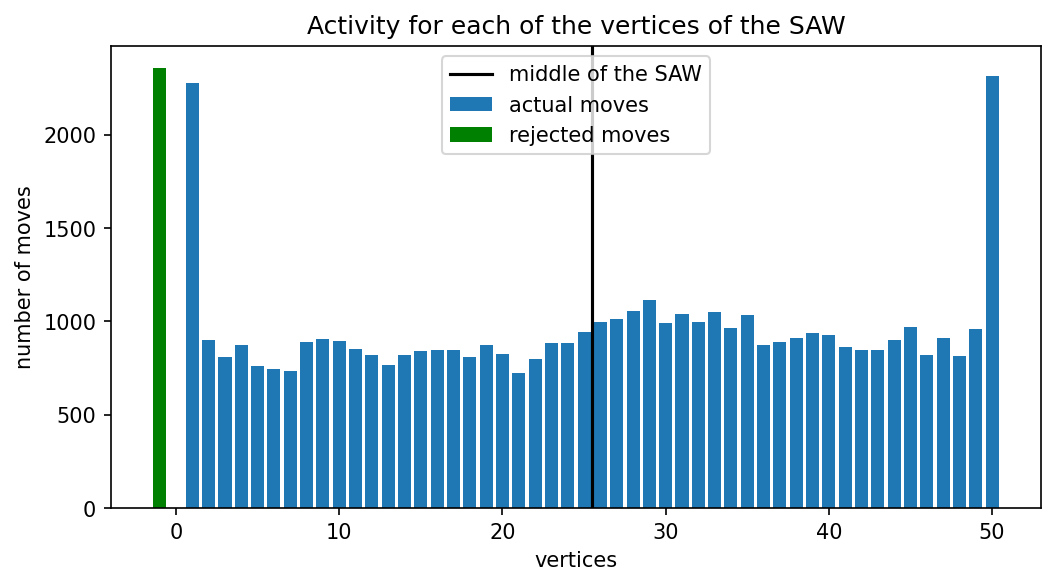

In [15]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title("Activity for each of the vertices of the SAW")
plt.xlabel('vertices')
plt.ylabel('number of moves')
#num_bins = 25
#plt.bar(vertices,all_poss_moves,color = 'red',label='possibility to move')
plt.bar(vertices,moves, label='actual moves')
#plt.bar(-1, 362,color = 'green', label='rejected moves')
plt.bar(-1, counter_list(activity,-1),color = 'green', label='rejected moves')
plt.axvline(25.5, color = 'k', label='middle of the SAW')
plt.legend(loc=9)
#print(activity)
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/notes/notes/Pictures/activity_discrep_h_flat_bc.png')#

## Global results

In [61]:
activity_all = []
overall_length_x = []
overall_length_y = []
poss_all = []
#iteration_list = [i for i in range(41)]
for i in range(21):
    file = "data_T=2/data_curved_nobc/variables_curvednobc_{}.txt"
    form_file = file.format(i)
    file = open(form_file, "r")
    #content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]
    lines = file.read().splitlines()
    magnetization_m = np.mean(list(map(float,((lines[1].replace('[','')).replace(']','')).split(","))))
    #print(i+1,",","m:",magnetization_m)
    energy_m = np.mean(list(map(float,((lines[3].replace('[','')).replace(']','')).split(","))))
    #print("E:",energy_m)
    energy1D_m = np.mean(list(map(float,((lines[5].replace('[','')).replace(']','')).split(","))))
    length_x = (list(map(float,((lines[7].replace('[','')).replace(']','')).split(","))))
    length_x_m = np.mean(length_x[len(length_x)//2:])
    overall_length_x.append(length_x_m)
    #print(i+1,",","l_x:",length_x_m)
    length_y = (list(map(float,((lines[8].replace('[','')).replace(']','')).split(","))))
    length_y_m = np.mean(length_y[len(length_y)//2:])
    overall_length_y.append(length_y_m)
    #print(i+1,",","l_y:",length_y_m)
    activity_temp = list(map(int,((lines[10].replace('[','')).replace(']','')).split(",")))
    activity_all = list(itertools.chain(activity_all, activity_temp))
    numer_of_regions_m = np.mean(list(map(int,((lines[12].replace('[','')).replace(']','')).split(","))))
    poss_temp = list(map(int,((lines[14].replace('[','')).replace(']','')).split(",")))
    poss_all = list(itertools.chain(poss_all, poss_temp))
    file.close()
    #print(i+1)
    #print('-'*100)
print(np.mean(overall_length_x))
print(np.mean(overall_length_y))

7.896877142857143
25.164911428571425


In [62]:
n=64
vertices = [i for i in range(1,n+1)]
moves = [counter_list(activity_all,i) for i in range(n)]
all_poss_moves = [counter_list(poss_all,i) for i in range(n)]

In [63]:
print(sum(moves))

995332


In [64]:
#print(poss)
rejected_moves_all = counter_list(activity_all,-1)
print("number of rejected moves:",rejected_moves_all)

number of rejected moves: 55481


In [65]:
print(rejected_moves_all + sum(moves))
print(rejected_moves_all/(sum(moves)+rejected_moves_all))

1050813
0.052798166752790456


In [66]:
print("vertices:",vertices)
print("length: ",len(vertices))
print('moves:',moves)
print("length: ",len(moves))
print("all possible moves:",all_poss_moves)
print("length: ",len(all_poss_moves))
print("mean of moves left vs right")
print(np.mean(moves[:25]))
print(np.mean(moves[25:]))
print("mean possible moves left vs right")
print(np.mean(all_poss_moves[:25]))
print(np.mean(all_poss_moves[25:]))

vertices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
length:  64
moves: [39402, 16924, 15306, 15635, 15534, 15509, 14764, 15024, 15637, 15526, 14645, 14168, 14518, 15155, 15191, 15543, 15770, 15935, 15190, 15218, 14997, 13645, 13293, 13333, 13465, 14467, 14361, 14591, 14399, 14205, 13966, 13975, 13572, 13743, 14091, 14341, 14790, 14355, 14038, 13510, 13570, 13567, 14296, 14693, 15055, 15234, 15775, 15931, 15782, 15097, 14674, 14650, 14299, 14335, 14428, 14585, 15318, 14878, 15354, 15278, 15195, 14939, 17024, 39644]
length:  64
all possible moves: [1013672, 442944, 401025, 419014, 419112, 423204, 405663, 412138, 418473, 418871, 399100, 392069, 396227, 416710, 421257, 428474, 426356, 430854, 421954, 421655, 412586, 384752, 375256, 378886, 382473, 400779, 404626, 406378, 407455, 399768, 

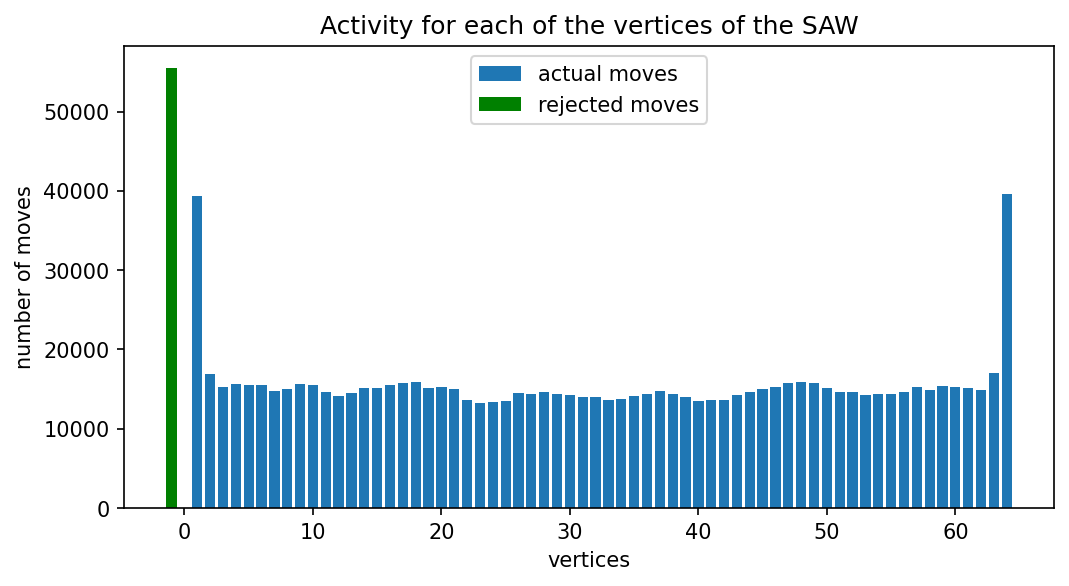

In [67]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title("Activity for each of the vertices of the SAW")
plt.xlabel('vertices')
plt.ylabel('number of moves')
#num_bins = 25
#plt.bar(vertices,all_poss_moves,color = 'red',label='possibility to move')
plt.bar(vertices,moves, label='actual moves')
#plt.bar(-1, 362,color = 'green', label='rejected moves')
plt.bar(-1, rejected_moves_all,color = 'green', label='rejected moves')
#plt.axvline(25.5, color = 'k', label='middle of the SAW')
plt.legend(loc=9)
#print(activity)
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/notes/notes/Pictures/activity_discrep_h_curved_nobc.png')

## Number of regions

In [41]:
for i in range(15):
    string='data_lowT/data_flat_bc/lowT_variables_flatbc_{}.txt'
    filename = string.format(i)
    file = open(filename, "r")
    lines = file.read().splitlines()
    numer_of_regions = list(map(int,((lines[12].replace('[','')).replace(']','')).split(",")))
    #print(len(numer_of_regions))
    steps = [j for j in range(101)]
    z_regions = np.polyfit(steps[10:], numer_of_regions[10:], 1)
    p_regions = np.poly1d(z_regions)
    #print(p_regions)
    print(i,":",z_regions[0])
    #print(numer_of_regions[-1])
    #print(np.mean(numer_of_regions))
    #print(numer_of_regions)

0 : -0.010288262462175544
1 : -0.02353878006051923
2 : -0.006911928651059094
3 : 0.008217869087434286
4 : -0.04366937410415677
5 : -0.01818760949195734
6 : -9.55566172957604e-05
7 : -0.0047459786590221655
8 : -0.062494027711419056
9 : 0.014588310240484159
10 : -0.02143653448001279
11 : 0.0032170727822901733
12 : -0.019366141105271576
13 : -0.009364548494983289
14 : -0.006370441153049867


## Curvature files

In [112]:
#to quickly iterate over all curvature files
'''
for i in range(21):
    string = 'data_curved_bc/curvature_curvedbc_{}.txt'
    filename = string.format(i)
    file = open(filename, "r")
    #content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]
    lines = file.read().splitlines()
    
    steps = [i for i in range(101)]
    curv_begin = list(map(float,((lines[0].replace('{{','')).replace('}}','')).split(",")))
    curv_mid = list(map(float,((lines[1].replace('{{','')).replace('}}','')).split(",")))
    curv_end = list(map(float,((lines[2].replace('{{','')).replace('}}','')).split(",")))
    z_b = np.polyfit(steps, curv_begin, 1)
    p_b = np.poly1d(z_b)
    z_m = np.polyfit(steps, curv_mid, 1)
    p_m = np.poly1d(z_m)
    z_e = np.polyfit(steps, curv_end, 1)
    p_e = np.poly1d(z_e)
    print(i+1,":")
    print("p_b:", p_b)
    print("p_m:", p_m)
    print("p_e:", p_e)
'''

'\nfor i in range(21):\n    string = \'data_curved_bc/curvature_curvedbc_{}.txt\'\n    filename = string.format(i)\n    file = open(filename, "r")\n    #content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]\n    lines = file.read().splitlines()\n    \n    steps = [i for i in range(101)]\n    curv_begin = list(map(float,((lines[0].replace(\'{{\',\'\')).replace(\'}}\',\'\')).split(",")))\n    curv_mid = list(map(float,((lines[1].replace(\'{{\',\'\')).replace(\'}}\',\'\')).split(",")))\n    curv_end = list(map(float,((lines[2].replace(\'{{\',\'\')).replace(\'}}\',\'\')).split(",")))\n    z_b = np.polyfit(steps, curv_begin, 1)\n    p_b = np.poly1d(z_b)\n    z_m = np.polyfit(steps, curv_mid, 1)\n    p_m = np.poly1d(z_m)\n    z_e = np.polyfit(steps, curv_end, 1)\n    p_e = np.poly1d(z_e)\n    print(i+1,":")\n    print("p_b:", p_b)\n    print("p_m:", p_m)\n    print("p_e:", p_e)\n'

In [88]:
file = open('data_T=2/data_flat_nobc/curvature_flatnobc_0.txt', "r")
#content of file : [name1,magnetization,name2, energy,name3, energy1D,name4, length_x,length_y,name5, activity, name6, number of regions, name7,poss]
lines = file.read().splitlines()

steps = [i for i in range(101)]
curv_begin = list(map(float,((lines[0].replace('{{','')).replace('}}','')).split(",")))
curv_begin = curv_begin[10:]
curv_mid = list(map(float,((lines[1].replace('{{','')).replace('}}','')).split(",")))
curv_mid = curv_mid[10:]
curv_end = list(map(float,((lines[2].replace('{{','')).replace('}}','')).split(",")))
curv_end = curv_end[10:]

In [89]:
print(curv_begin)
print(curv_mid)
print(curv_end)

[0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, -1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 2.0, 0.0, 0.0, -1.0, 0.0, 2.0, -1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2.0, -1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -2.0, 0.0, 0.0, -1.0, 0.0, 0.0, 

In [65]:
z_b = np.polyfit(steps, curv_begin, 1)
p_b = np.poly1d(z_b)
z_m = np.polyfit(steps, curv_mid, 1)
p_m = np.poly1d(z_m)
z_e = np.polyfit(steps, curv_end, 1)
p_e = np.poly1d(z_e)

TypeError: expected x and y to have same length

In [ ]:
print("p_b:", p_b)
print("p_m:", p_m)
print("p_e:", p_e)

ValueError: x and y must be the same size

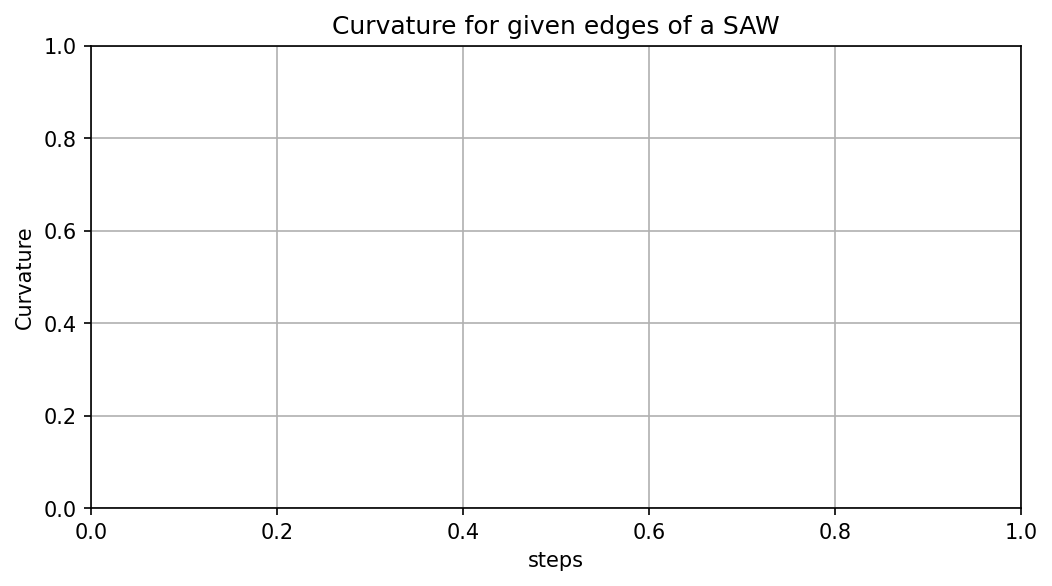

In [90]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Curvature for given edges of a SAW')
plt.xlabel('steps')
plt.ylabel('Curvature')
plt.grid()
plt.scatter(steps, curv_begin,s=10, color = 'blue', label = '(5,6)')
plt.scatter(steps, curv_mid,s=10,color = 'red', label = '(25,26)')
plt.scatter(steps, curv_end,s=10,color = 'k', label = '(45,46)')
plt.plot(steps, p_b(steps), color = 'blue', label = 'trend (5,6)')
plt.plot(steps, p_m(steps), color = 'red', label = 'trend (25,26)')
plt.plot(steps, p_e(steps), color = 'k', label = 'trend (45,46)')
#plt.plot(x, τ_opt1*x, color = 'blue', label = 'trend (5,6)')
#plt.plot(x, τ_opt2*x, color =', label = 'trend (25,26)')
#plt.plot(x, τ_opt3*x, color = 'k', label = 'trend (45,46)')
#plt.plot(steps, curv_begin)
#plt.plot(steps, curv_mid)
#plt.plot(steps, curv_end)
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/notes/notes/Pictures/metropol_curvature_combo_flat.png', bbox_inches = 'tight')

In [91]:
poss_curvature = [-2, -1,0,1,2]
curv_counter_begin = [np.round(counter_list(curv_begin,i)/len(curv_begin),2) for i in [-2,-1,0,1,2]]
curv_counter_mid = [np.round(counter_list(curv_mid,i)/len(curv_mid),2) for i in [-2,-1,0,1,2]]
curv_counter_end = [np.round(counter_list(curv_end,i)/len(curv_end),2) for i in [-2,-1,0,1,2]]

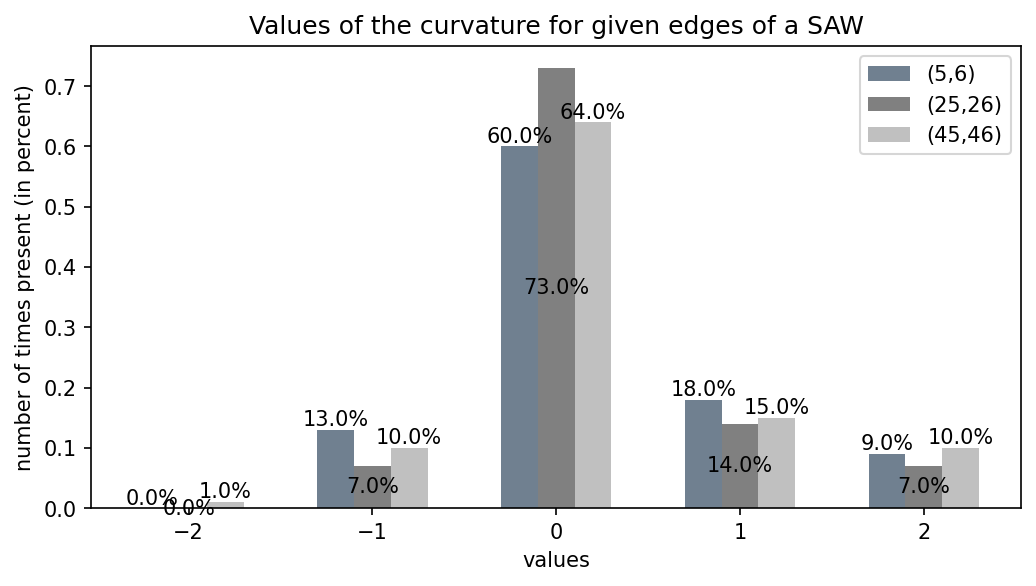

In [92]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Values of the curvature for given edges of a SAW')
plt.xlabel('values')
plt.ylabel('Number of times present (in percent)')
label_begin = [f"{np.round(100*a,2)}%" for a in curv_counter_begin]
label_mid = [f"{np.round(100*a,2)}%" for a in curv_counter_mid]
label_end= [f"{np.round(100*a,2)}%" for a in curv_counter_end]
#plt.grid()
#plt.ylim(0,1)
p1 = plt.bar([x-0.2 for x in poss_curvature], curv_counter_begin,width=0.2, color = 'slategrey', label = '(5,6)')
p2 = plt.bar(poss_curvature, curv_counter_mid,width=0.2, color='grey', label='(25,26)')
p3 = plt.bar([x+0.2 for x in poss_curvature], curv_counter_end,width=0.2, color = 'silver', label='(45,46)')
ax.bar_label(p1,labels=label_begin, label_type="edge")
ax.bar_label(p2,labels=label_mid, label_type="center")
ax.bar_label(p3,labels=label_end, label_type="edge")
#for container in ax.containers:
#    ax.bar_label(container, label_type='edge')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/notes/notes/Pictures/curvature_hist_curved_bc.png', bbox_inches = 'tight')

## Curvature Global results

In [47]:
curv_begin_all = []#[0]*101
curv_mid_all = []# [0]*101
curv_end_all =[]#[0]*101
for i in range(15):
    #string = 'data_T=2/data_curved_nobc/curvature_curvednobc_{}.txt'
    string = 'data_lowT/data_flat_bc/lowT_curvature_flatbc_{}.txt'
    #string = 'data_T=2/data_curved_nobc/curvature_curvednobc_{}.txt'
    #string = 'data_curved_bc/curvature_curvedbc_{}.txt'
    filename = string.format(i)
    file = open(filename, "r")
    lines = file.read().splitlines()
    steps = [i for i in range(101)]
    curv_begin = list(map(float,((lines[0].replace('{{','')).replace('}}','')).split(",")))
    curv_begin_all = list(itertools.chain(curv_begin_all, curv_begin[10:]))
    #curv_begin_all = [(curv_begin_all[i]+curv_begin[i])/21 for i in range(len(curv_begin))]
    curv_mid = list(map(float,((lines[1].replace('{{','')).replace('}}','')).split(",")))
    #curv_mid_all = [(curv_mid_all[i]+curv_mid[i])/21 for i in range(len(curv_mid))]
    curv_mid_all = list(itertools.chain(curv_mid_all, curv_mid[10:]))
    curv_end = list(map(float,((lines[2].replace('{{','')).replace('}}','')).split(",")))
    #curv_end_all = [(curv_end_all[i]+curv_end[i])/21 for i in range(len(curv_end))]
    curv_end_all = list(itertools.chain(curv_end_all, curv_end[10:]))
    #z_b = np.polyfit(steps, curv_begin, 1)
    #p_b = np.poly1d(z_b)
    #z_m = np.polyfit(steps, curv_mid, 1)
    #p_m = np.poly1d(z_m)
    #z_e = np.polyfit(steps, curv_end, 1)
    #p_e = np.poly1d(z_e)
    #print(i, ":")
    #print("p_b:", p_b)
    #print("p_m:", p_m)
    #print("p_e:", p_e)

In [48]:
print(len(curv_begin_all))
#print(curv_begin_all)
print(np.mean(curv_begin_all))
#print(curv_mid_all)
print(np.mean(curv_mid_all))
#print(curv_end_all)
print(np.mean(curv_end_all))

1365
0.40073260073260075
0.24102564102564103
0.3457875457875458


In [49]:
'''
z_b = np.polyfit(steps, curv_begin_all, 1)
p_b = np.poly1d(z_b)
z_m = np.polyfit(steps, curv_mid_all, 1)
p_m = np.poly1d(z_m)
z_e = np.polyfit(steps, curv_end_all, 1)
p_e = np.poly1d(z_e)
print("p_b:", p_b)
print("p_m:", p_m)
print("p_e:", p_e)
'''

'\nz_b = np.polyfit(steps, curv_begin_all, 1)\np_b = np.poly1d(z_b)\nz_m = np.polyfit(steps, curv_mid_all, 1)\np_m = np.poly1d(z_m)\nz_e = np.polyfit(steps, curv_end_all, 1)\np_e = np.poly1d(z_e)\nprint("p_b:", p_b)\nprint("p_m:", p_m)\nprint("p_e:", p_e)\n'

In [50]:
'''fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Curvature for given edges of a SAW')
plt.xlabel('steps')
plt.ylabel('Curvature')
plt.grid()
#plt.axhline(1/21,color='orange', label="curvature 1")
#plt.axhline(2/21, color='cyan' ,label = "curvature 2")
#plt.axhline(-1/21, color='green',label="curvature -1")
#plt.axhline(-2/21, color='olive',label = "curvature -2")
plt.scatter(steps, curv_begin_all,s=10, color = 'blue', label = '(5,6)')
plt.scatter(steps, curv_mid_all,s=10,color = 'red', label = '(25,26)')
plt.scatter(steps, curv_end_all,s=10,color = 'k', label = '(45,46)')
#plt.plot(steps, p_b(steps), color = 'blue', label = 'trend (5,6)')
#plt.plot(steps, p_m(steps), color = 'red', label = 'trend (25,26)')
#plt.plot(steps, p_e(steps), color = 'k', label = 'trend (45,46)')
#plt.plot(x, τ_opt1*x, color = 'blue', label = 'trend (5,6)')
#plt.plot(x, τ_opt2*x, color =', label = 'trend (25,26)')
#plt.plot(x, τ_opt3*x, color = 'k', label = 'trend (45,46)')
#plt.plot(steps, curv_begin)
#plt.plot(steps, curv_mid)
#plt.plot(steps, curv_end)
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/notes/notes/Pictures/metropol_curvature_combo_flat.png', bbox_inches = 'tight')'''

'fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))\nplt.title(\'Curvature for given edges of a SAW\')\nplt.xlabel(\'steps\')\nplt.ylabel(\'Curvature\')\nplt.grid()\n#plt.axhline(1/21,color=\'orange\', label="curvature 1")\n#plt.axhline(2/21, color=\'cyan\' ,label = "curvature 2")\n#plt.axhline(-1/21, color=\'green\',label="curvature -1")\n#plt.axhline(-2/21, color=\'olive\',label = "curvature -2")\nplt.scatter(steps, curv_begin_all,s=10, color = \'blue\', label = \'(5,6)\')\nplt.scatter(steps, curv_mid_all,s=10,color = \'red\', label = \'(25,26)\')\nplt.scatter(steps, curv_end_all,s=10,color = \'k\', label = \'(45,46)\')\n#plt.plot(steps, p_b(steps), color = \'blue\', label = \'trend (5,6)\')\n#plt.plot(steps, p_m(steps), color = \'red\', label = \'trend (25,26)\')\n#plt.plot(steps, p_e(steps), color = \'k\', label = \'trend (45,46)\')\n#plt.plot(x, τ_opt1*x, color = \'blue\', label = \'trend (5,6)\')\n#plt.plot(x, τ_opt2*x, color =\', label = \'trend (25,26)\')\n#plt.plot(x, τ_opt3

In [51]:
poss_curvature = [-2, -1,0,1,2]
curv_counter_begin = [np.round(counter_list(curv_begin_all,i)/len(curv_begin_all),2) for i in [-2,-1,0,1,2]]
curv_counter_mid = [np.round(counter_list(curv_mid_all,i)/len(curv_mid_all),2) for i in [-2,-1,0,1,2]]
curv_counter_end = [np.round(counter_list(curv_end_all,i)/len(curv_end_all),2) for i in [-2,-1,0,1,2]]

#print(len(poss_curvature))
#print(len(curv_counter))
#plt.bar(poss_curvature, curv_counter)

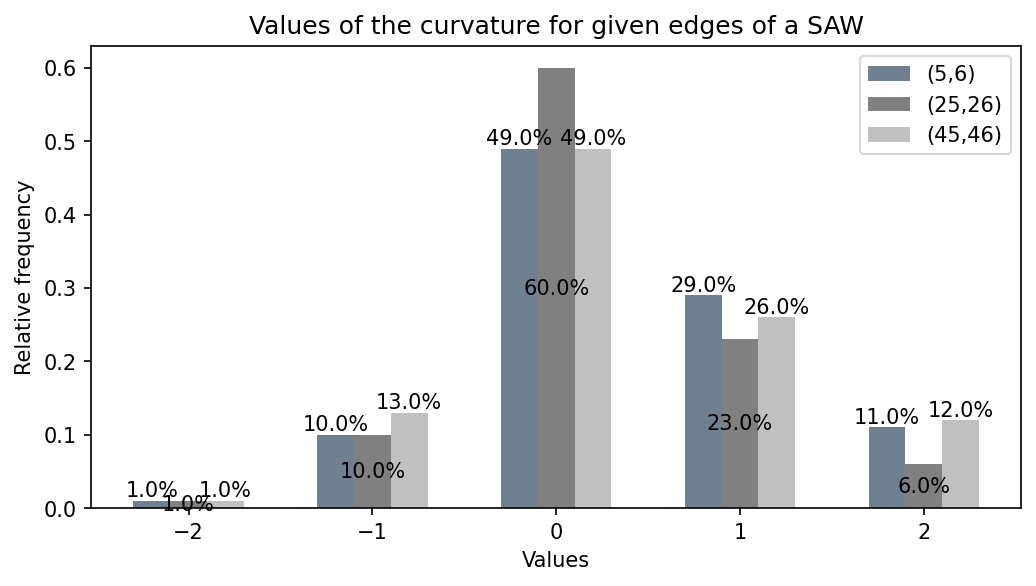

In [53]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 4))
plt.title('Values of the curvature for given edges of a SAW')
plt.xlabel('Values')
plt.ylabel('Relative frequency')
label_begin = [f"{np.round(100*a,2)}%" for a in curv_counter_begin]
label_mid = [f"{np.round(100*a,2)}%" for a in curv_counter_mid]
label_end= [f"{np.round(100*a,2)}%" for a in curv_counter_end]
#plt.grid()
#plt.ylim(0,1)
p1 = plt.bar([x-0.2 for x in poss_curvature], curv_counter_begin,width=0.2, color = 'slategrey', label = '(5,6)')
p2 = plt.bar(poss_curvature, curv_counter_mid,width=0.2, color='grey', label='(25,26)')
p3 = plt.bar([x+0.2 for x in poss_curvature], curv_counter_end,width=0.2, color = 'silver', label='(45,46)')
ax.bar_label(p1,labels=label_begin, label_type="edge")
ax.bar_label(p2,labels=label_mid, label_type="center")
ax.bar_label(p3,labels=label_end, label_type="edge")
#for container in ax.containers:
#    ax.bar_label(container, label_type='edge')
ax.legend()
#fig.savefig('/home/sander/Documents/School/univ/Fysica/master/fase_3/thesis/thesis/Pictures/curvature_hist_flat_bc_lowT.png', bbox_inches = 'tight')

## Activity relative T global

In [ ]:
rejected_move = []


In [191]:
file = open('data_rel_T/activity_rel_fnbc.txt',"r")
lines = file.read().splitlines()
#activity = list(map(float,((lines[0].replace('[[','')).replace(']]','')).split(",")))
global_activity = {}
index_activity = [i for i in range(1,51)]
#global_activity["rejected move"] = []
for i in range(44):
    print(i)
    string = "activity_{}"
    formatted_string = string.format(i)
    #index_activity.append(formatted_string)
    activity = list(map(float,((lines[i].replace('[[','')).replace(']]','')).split(",")))
    counter_value = [counter_list(activity,j) for j in range(50)]
    global_activity[formatted_string] = counter_value
    #global_activity["rejected move"].append(counter_list(activity,-1))
print(global_activity)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
{'activity_0': [247, 57, 55, 46, 59, 88, 1020, 999, 878, 888, 905, 953, 1006, 987, 1127, 1042, 1044, 1028, 936, 982, 1034, 1098, 1058, 916, 880, 942, 862, 829, 806, 732, 792, 730, 686, 654, 684, 654, 694, 660, 646, 694, 656, 600, 370, 243, 64, 19, 11, 32, 17, 656], 'activity_1': [1179, 123, 43, 29, 17, 18, 20, 10, 72, 200, 336, 505, 660, 494, 420, 378, 322, 295, 295, 277, 245, 361, 467, 527, 550, 618, 685, 745, 782, 900, 987, 1095, 1140, 1112, 1048, 1084, 1143, 1171, 957, 808, 848, 730, 580, 423, 187, 148, 167, 125, 223, 1003], 'activity_2': [1975, 562, 363, 316, 292, 227, 230, 325, 417, 604, 657, 632, 621, 481, 368, 501, 699, 975, 1150, 1279, 1381, 1294, 1102, 861, 857, 693, 575, 532, 438, 470, 527, 566, 544, 522, 563, 398, 314, 371, 240, 246, 377, 403, 427, 356, 301, 252, 284, 308, 499, 1574], 'activity_3': [1989, 687, 550, 409, 445, 363, 425, 356, 343, 301, 288, 

In [192]:
print(len(global_activity['activity_1']))

50


In [193]:
df = pd.DataFrame(global_activity, index=index_activity)
#print(df)

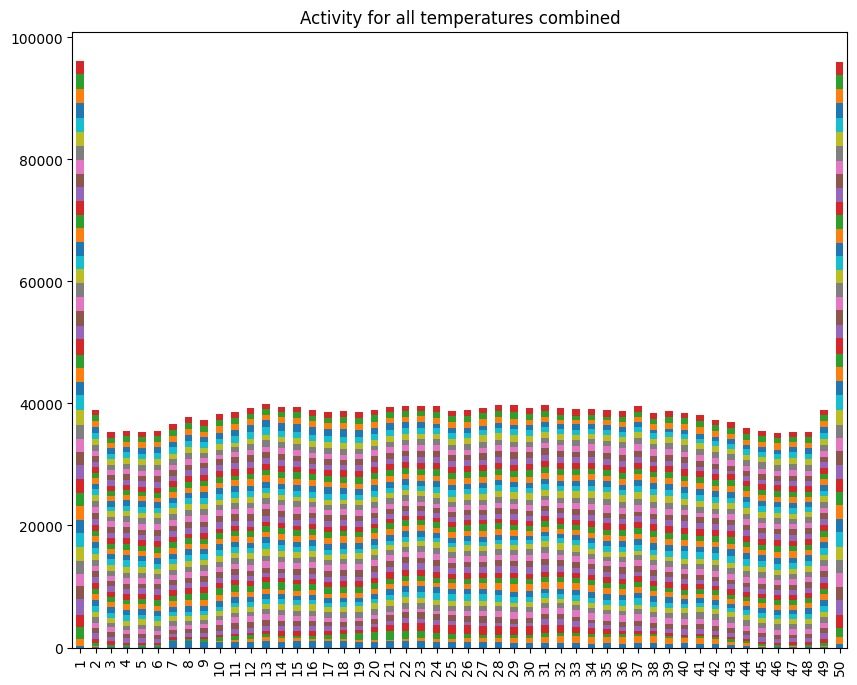

In [196]:
df.plot(kind="bar",title='Activity for all temperatures combined',legend=False, stacked=True, figsize=(10, 8))
#plt.legend(loc="lower left", bbox_to_anchor=(0.8, 1.0))
plt.show()